<a href="https://colab.research.google.com/github/TitoArellano/Proyecto_CH_III_Ciencia_de_datos_/blob/main/Proyecto_CH_III_Ciencia_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics

# **Proyecto de Clasificación de ataques cardiaco en jóvenes y adultos en Sudáfrica**

* El conjunto de datos tiene información relevante relacionada con los factores de riesgo de ataque cardiaco en la población sudafricana.
* El DataSet contiene detalles demográficos, historial médico, estilo de vida y hábitos para evaluar los resultados.
* Variable Objetivo: **Resultado de Ataque Cardiaco**: se identifica como binaria donde; 0 = NO y 1 = SI.


In [233]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Proyecto_ML_CD_II_HAP/heart_attack_south_africa.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**COPIA DE DATA SET ORIGNAL**
* Se respalda el dataset original, generaldo la copia con la cual se va a trabajar.

In [234]:
data_clean = df.copy()

# **Resumen de Datos Contenidos en el DataSet**

In [239]:
data_clean.shape
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  int64  
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  int64  
 11  Family_History_Heart_Disease  100000 non-null  int64  
 12  Diet_Quality                  100000 non-null

## **Clasificación de variables**
* Patient_ID - ID del paciente
* Age - Edad
* Gender - Género
* Cholesterol_Level - Nivel de colesterol
* Blood_Pressure_Systolic - Presión arterial sistólica
* Blood_Pressure_Diastolic - Presión arterial diastólica
* Smoking_Status - Estado de fumar
* Alcohol_Intake - Ingesta de alcohol
* Physical_Activity - Actividad física
* Obesity_Index - Índice de obesidad
* Diabetes_Status - Estado de diabetes
* Family_History_Heart_Disease - Antecedentes familiares de enfermedades cardíacas
* Diet_Quality - Calidad de la dieta
* Stress_Level - Nivel de estrés
* Heart_Attack_History - Historia de ataque cardíaco
* Medication_Usage - Uso de medicamentos
* Triglycerides_Level - Nivel de triglicéridos
* LDL_Level - Nivel de LDL
* HDL_Level - Nivel HDL
* Heart_Attack_Outcome - Resultado del ataque cardíaco




In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Age,100000.0,56.929210,18.776713,25.0,41.00,57.0,73.00,89.0
Cholesterol_Level,100000.0,224.578740,43.316257,150.0,187.00,225.0,262.00,299.0
Blood_Pressure_Systolic,100000.0,144.317750,31.759636,90.0,117.00,144.0,172.00,199.0
Blood_Pressure_Diastolic,100000.0,89.591950,17.277238,60.0,75.00,90.0,105.00,119.0
Obesity_Index,100000.0,29.004788,6.343317,18.0,23.50,29.0,34.50,40.0
Triglycerides_Level,100000.0,174.629860,72.118654,50.0,112.00,175.0,237.00,299.0
LDL_Level,100000.0,124.333400,43.340624,50.0,87.00,124.0,162.00,199.0
HDL_Level,100000.0,49.547090,17.350927,20.0,35.00,50.0,65.00,79.0
Heart_Attack_Outcome,100000.0,0.587320,0.492319,0.0,0.00,1.0,1.00,1.0


# **Revisión de Registros *Nulos***
* Se revisan los registros duplicados en el Dataset original.
* Se revisan los registros nulos contenidos en el Dataset de origen.
* Se genera grafica para revisión de columnas "Null".


In [207]:
df.duplicated().sum()

0

**REVISION DE DATOS**
* El DataSet no cuenta con registros duplicados.
* El Data set no cuenta con registros nulos.

Podemos inferir que el Dataset proporcionado, se encuentra "limpio" eso quiere decir que no tendremos que limpiar registros null o Duplicados.
Nos permitirá un correcto análisis para determinar algunos insight a continuación.


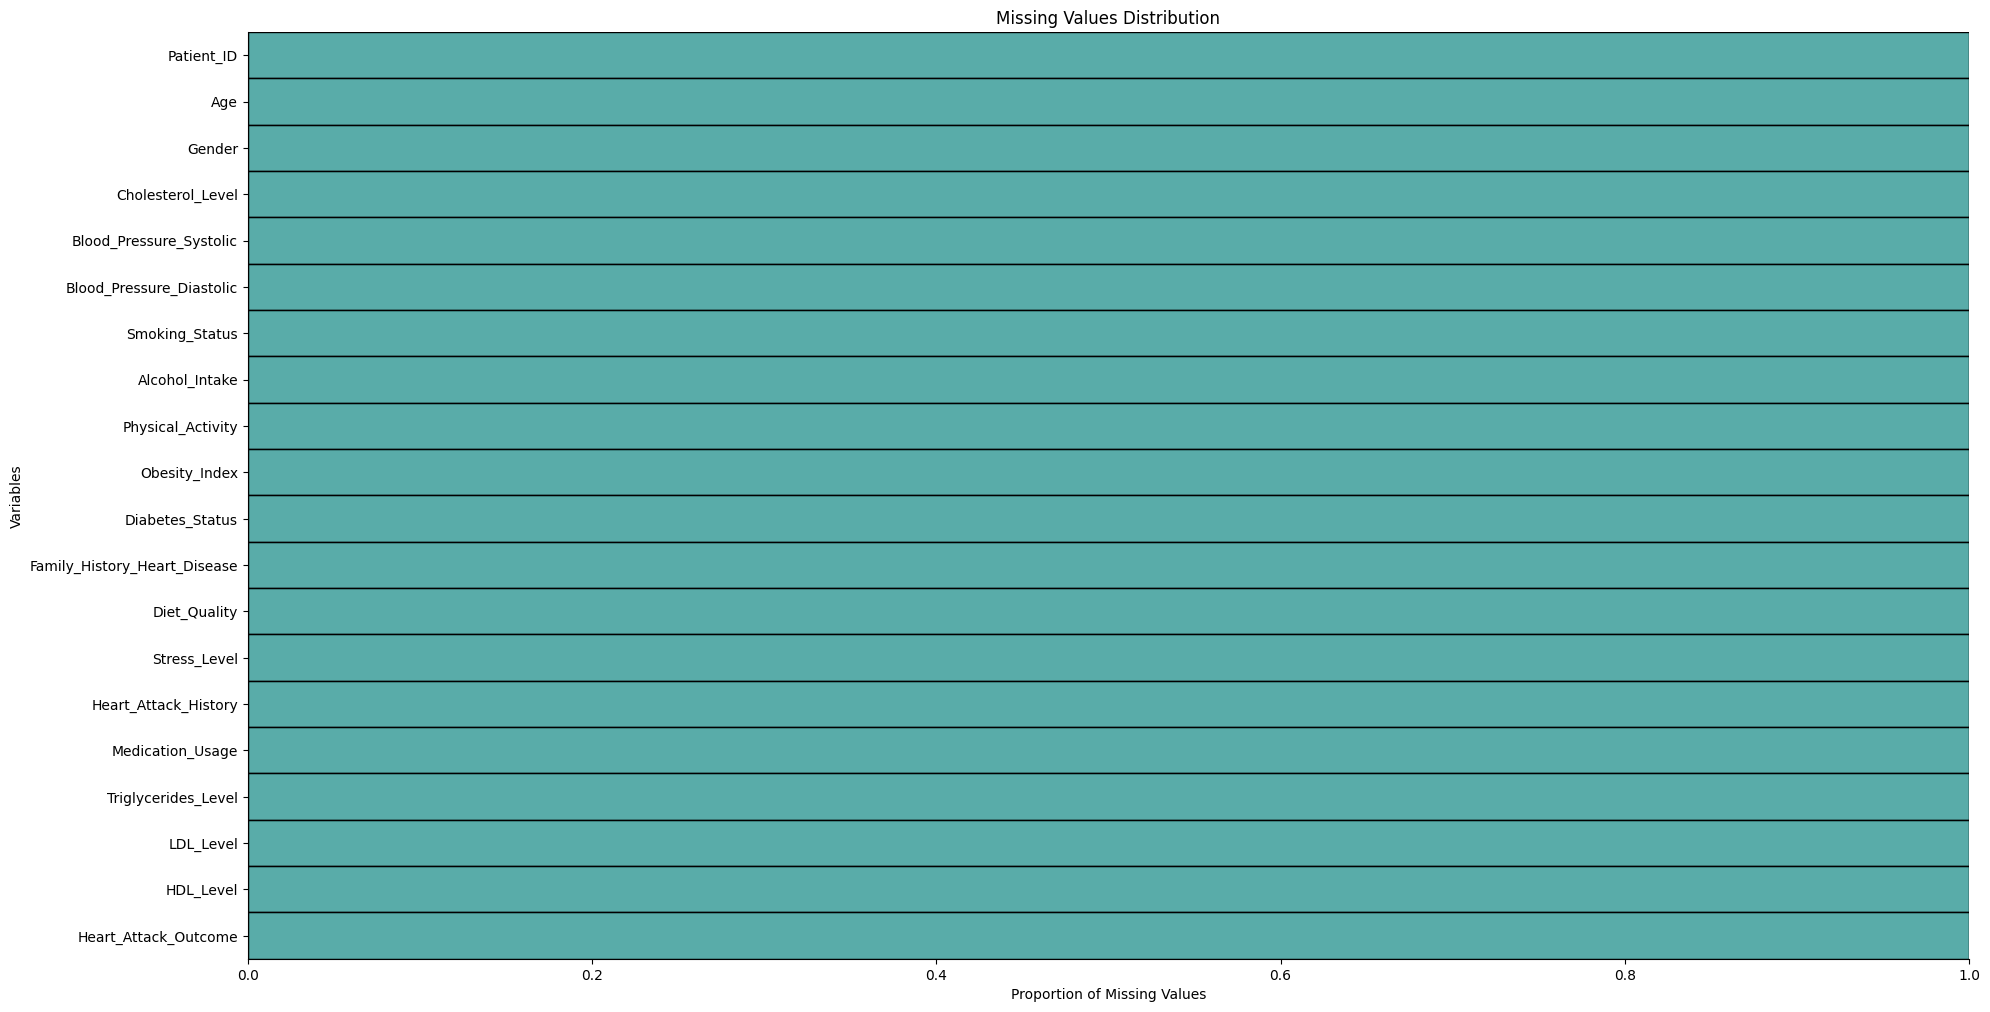

In [208]:
(df := df.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

# Añadir etiquetas
plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()

#**Normalzación y Tipos de Datos**
* Se normalizan los datos contenidos en el dataframe, con la finalidad de analizar de mejor manera los *insight*
* 'Smoking_Status' = de *object* a *int64*
* 'Diabetes_Status' = de *object* a *int64*
* 'Heart_Attack_History' = de *object* a *int64*
* 'Medication_Usage' = de *object* a *int64*
* 'Family_History_Heart_Disease' = de *object* a *int64*

In [235]:
data_clean['Smoking_Status'] = data_clean['Smoking_Status'].replace({'Yes': 1, 'No': 0})
data_clean['Diabetes_Status'] = data_clean['Diabetes_Status'].replace({'Yes': 1, 'No': 0})
data_clean['Heart_Attack_History'] = data_clean['Heart_Attack_History'].replace({'Yes': 1, 'No': 0})
data_clean['Medication_Usage'] = data_clean['Medication_Usage'].replace({'Yes': 1, 'No': 0})
data_clean['Family_History_Heart_Disease'] = data_clean['Family_History_Heart_Disease'].replace({'Yes': 1, 'No': 0})

<ipython-input-235-b1fb3e05b07e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Smoking_Status'] = data_clean['Smoking_Status'].replace({'Yes': 1, 'No': 0})
<ipython-input-235-b1fb3e05b07e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Diabetes_Status'] = data_clean['Diabetes_Status'].replace({'Yes': 1, 'No': 0})
<ipython-input-235-b1fb3e05b07e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.

In [247]:
data_clean.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Femenino,156,94,79,0,High,Sedentary,35.2,0,0,Good,High,0,0,264,141,65,No
1,2,39,Femenino,160,185,88,0,Low,Sedentary,21.3,0,0,Average,Medium,0,1,150,81,42,No
2,3,85,Masculino,254,173,113,1,Moderate,Highly Active,32.0,1,0,Good,Low,0,0,220,124,70,Sí
3,4,45,Femenino,261,187,65,0,High,Sedentary,36.4,0,1,Average,Low,0,1,141,56,38,Sí
4,5,48,Masculino,206,189,84,0,Low,Active,26.6,0,0,Good,High,0,0,221,186,26,No


# **Grafica de Análisis de Variables del Dataset**


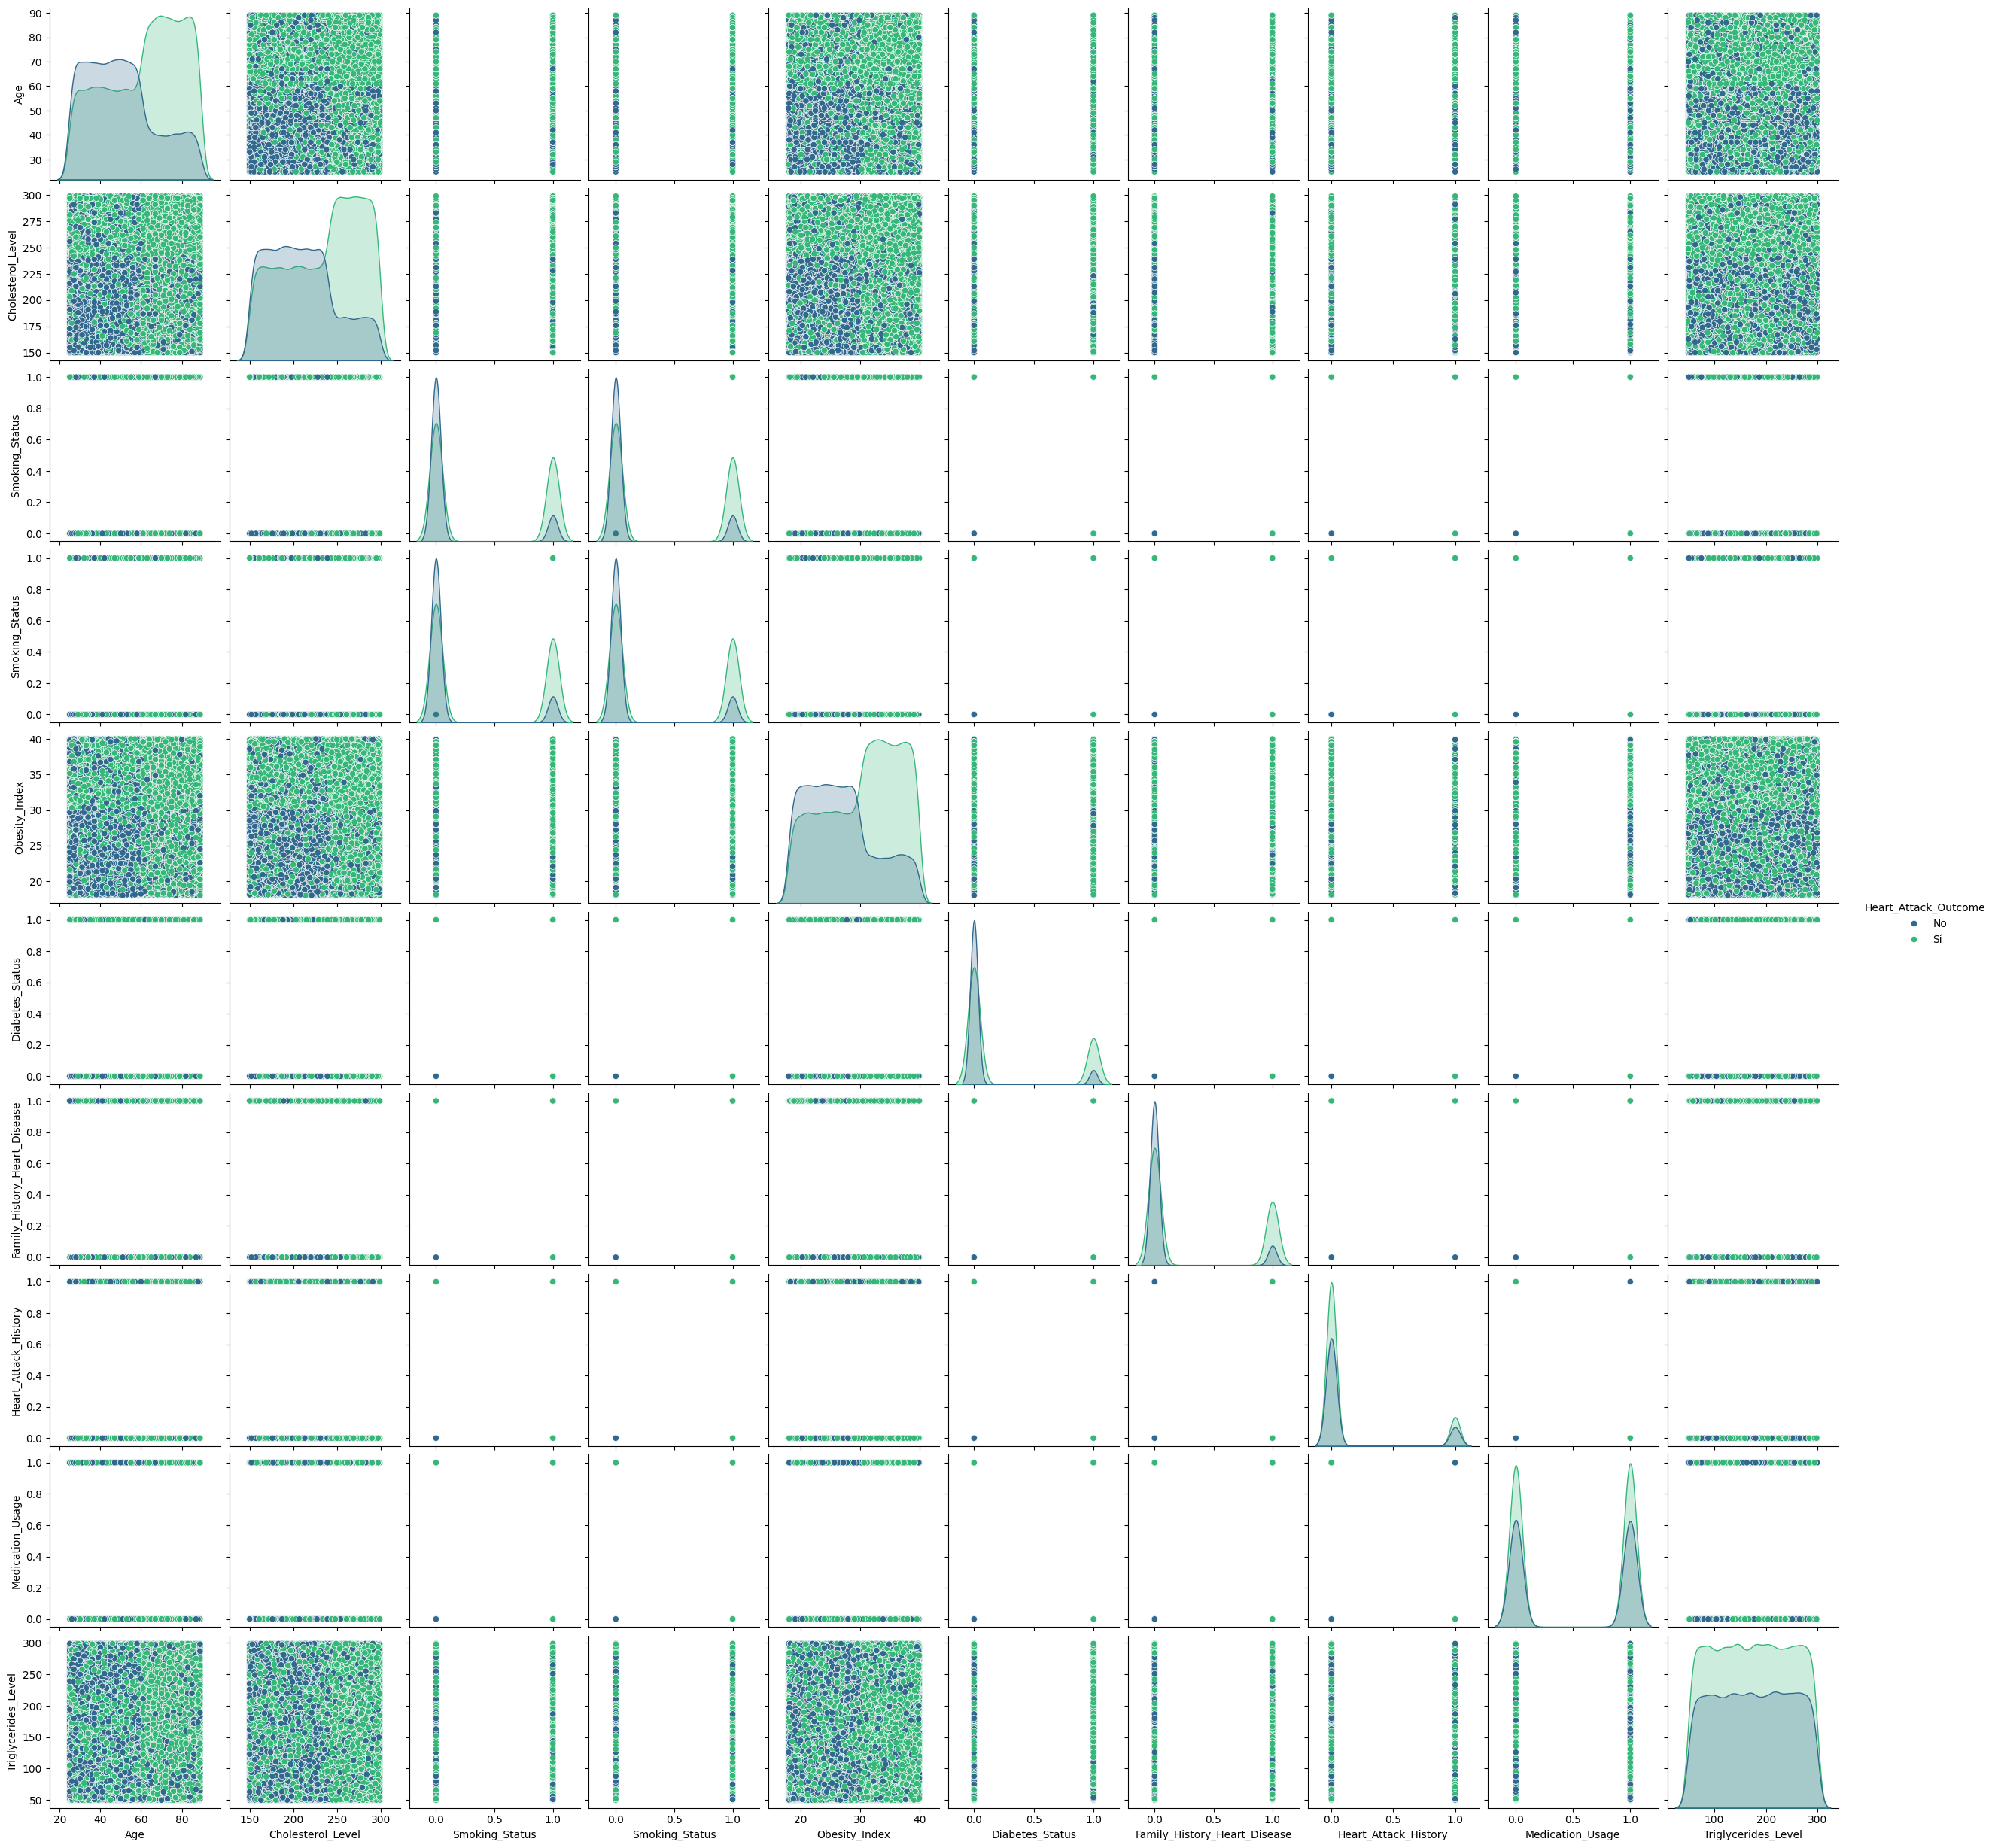

In [250]:
#Pairplot
sns.pairplot(data_clean, vars=['Age', 'Cholesterol_Level', 'Smoking_Status', 'Smoking_Status',	'Obesity_Index','Diabetes_Status', 'Family_History_Heart_Disease', 'Heart_Attack_History', 'Medication_Usage','Triglycerides_Level' ], hue='Heart_Attack_Outcome', palette='viridis',height=2.5) #'viridis'
plt.show()

# **Grafica de frecuencia de Ataques Cardiacos segun su Edad**
* En la gráfica vemos que a medida que avanzamos en nuestra edad, somos mas propensos de sufrir un ataque.
* Las Probabilidades aumenta a contar de los 58 años (Aprox) de sufrir riesgo de ataques cardiacos.


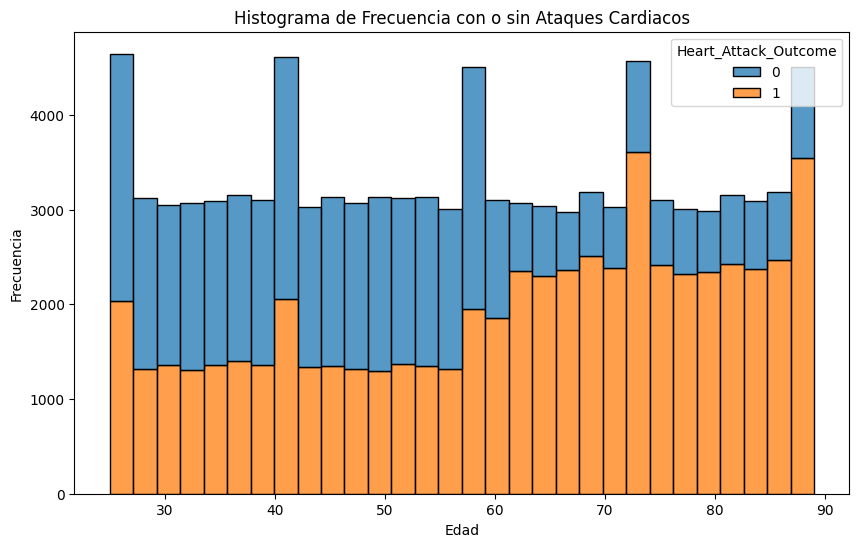

In [251]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age',hue='Heart_Attack_Outcome', multiple='stack', bins=30)
plt.title('Histograma de Frecuencia con o sin Ataques Cardiacos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# **Grafica de Representación de Ataques Cardiacos segun su Genero**
* En la gráfica vemos que tanto el sexo femenino como el masculino en el data set tiene similitud entre la cantidad de personas que cuentan con un ataque cardiaco.
* Lo mismo ocurre cuando revisamos aquellos q

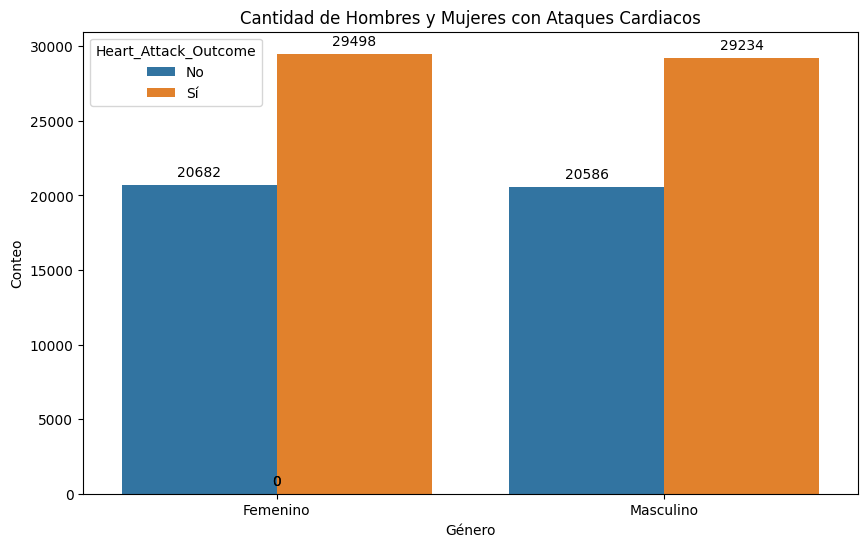

In [237]:
data_clean['Heart_Attack_Outcome'] = data_clean['Heart_Attack_Outcome'].map({1: 'Sí', 0: 'No'})
data_clean['Gender'] = data_clean['Gender'].map({'Male': 'Masculino', 'Female': 'Femenino'})
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Heart_Attack_Outcome', data=data_clean, palette='tab10') #
plt.title('Cantidad de Hombres y Mujeres con Ataques Cardiacos')
plt.xlabel('Género')
plt.ylabel('Conteo')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

# **Grafica de calor Distribuido entre Edad e índice de Obesidad**
* Se representa que el índice de obesidad, en relación con la edad, son más propensos a sufrir un ataque cardiaco, debido a las complicaciones que esto tiene.


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


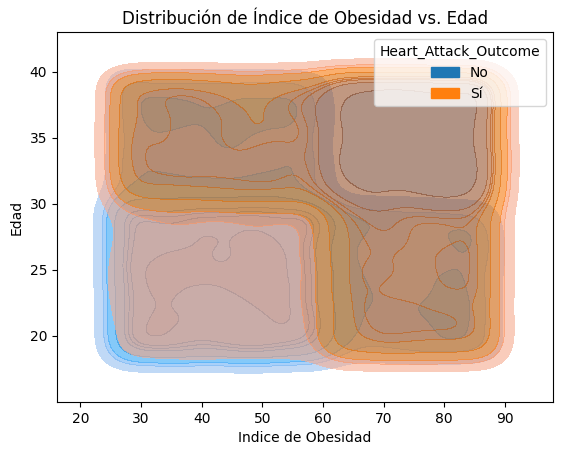

In [238]:
sns.kdeplot(data=data_clean, x='Age', y='Obesity_Index', hue='Heart_Attack_Outcome', fill=True, cmap='coolwarm', alpha=0.6)
plt.title('Distribución de Índice de Obesidad vs. Edad')
plt.xlabel('Indice de Obesidad')
plt.ylabel('Edad')
plt.show()

# **Grafica de violín Representado la edad y si sufrio o no un Ataque Cardiaco**
* Representa que los media de aquellos que si sufrieron un Ataque Cardiaco es de 65 años.
* Los violines nos representa que la distribución de aquellos que tuvieron o no un ataque están relativamente equitativos dada su anchura.
* Los que si tuvieron un ataque, se encuentran distribuidos en la parte superior ("Sí") permitiéndonos deducir que se encuentran en una mayor edad.


<ipython-input-177-1543d1479e4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Attack_Outcome', y='Age', data=data_clean, palette='Set3')


Text(0, 0.5, 'Edad')

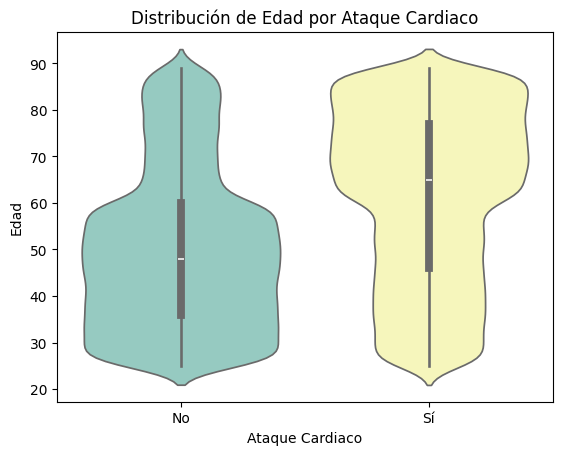

In [177]:
sns.violinplot(x='Heart_Attack_Outcome', y='Age', data=data_clean, palette='Set3')
plt.figure(figsize=(10, 6))
plt.title('Distribución de Edad por Ataque Cardiaco')
plt.xlabel('Ataque Cardiaco')
plt.ylabel('Edad')